In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image 

In [4]:
img = cv2.imread('C:/Users/34371/Desktop/rosbag.imp',0)

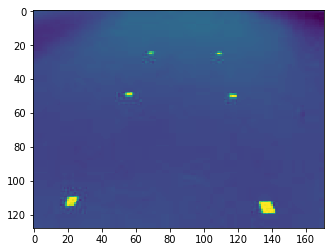

In [5]:
plt.imshow(img)

True

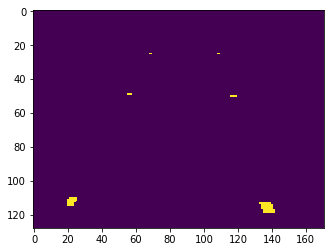

In [6]:
_, result = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY)  
plt.imshow(result) 
cv2.imwrite('result.png', result)

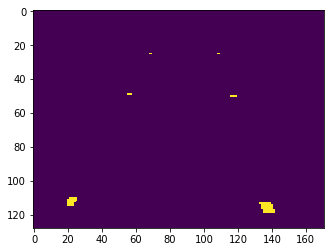

In [90]:
img = Image.fromarray(result)
plt.imshow(img)

True

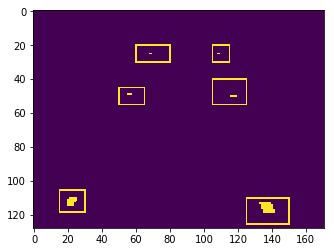

In [8]:
result_ = cv2.rectangle(result, (60,20), (80,30), (255,255,255), 1)
result_ = cv2.rectangle(result, (105,20), (115,30), (255,255,255), 1) 
result_ = cv2.rectangle(result, (50,45), (65,55), (255,255,255), 1) 
result_ = cv2.rectangle(result, (105, 40), (125,55), (255,255,255), 1)
result_ = cv2.rectangle(result, (15,105), (30,118), (255,255,255), 1)
result_ = cv2.rectangle(result, (125,110), (150,125), (255,255,255), 1)
plt.imshow(result_)
cv2.imwrite('result_.png', result)

In [9]:
result_[22][60]  

255

In [10]:
x_ = []
y_ = []
center_points_x = []
center_points_y = []
for i in range(20,30):
    for j in range(60,80):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

for i in range(20,30):
    for j in range(105, 115):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

for i in range(45,55):
    for j in range(50,65):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

for i in range(40,55):
    for j in range(105,125):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

for i in range(105,118):
    for j in range(15,30):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

for i in range(110,125):
    for j in range(125,150):
        #print(i, j)
        if result[i][j] > 0:
            x_.append(i)
            y_.append(j)
                
center_points_x.append(np.mean(x_))
center_points_y.append(np.mean(y_))

In [11]:
print(center_points_y,center_points_x)

[21.774193548387096, 22.115384615384617, 30.658227848101266, 34.93162393162393, 57.642857142857146, 76.02409638554217] [66.6774193548387, 83.15384615384616, 73.37974683544304, 85.7008547008547, 65.88690476190476, 88.37349397590361]


In [47]:
k1 = k2 = t1 = t2 = t3 = 0 

fx = 383.7944641113281
fy = 383.7944641113281 
cx = 322.3056945800781 
cy = 241.67051696777344

real_world_x = [0.2, -0.2, 0.2, -0.2, -0.2, -0.2]
real_world_y = [0.5, 0.5, 0.8, 0.8, 1.1, 1.1]

n = len(real_world_x)

D = np.array([0, 0, 0, 0, 0])
K = np.array([[fx, 0, cx], [0,fy,cy,], [0, 0, 1]])
op = np.zeros((n, 3, 1))
ip = np.zeros((n, 2, 1))

for i in range(n):
    op[i] = [[real_world_y[i]], [real_world_x[i]], [1]] 
for i in range(n):
    ip[i] = [[center_points_y[i]], [center_points_x[i]]]

In [52]:
retval, rvec, tvec = cv2.solvePnP(op, ip, K, D)

In [53]:
print(retval, rvec, tvec)

True [[0.67154605]
 [0.26497159]
 [1.93541191]] [[-4.07120809]
 [-3.67485951]
 [ 4.75487245]]


In [57]:
dst, jacobian = cv2.Rodrigues(rvec)
print(dst)

[[-0.31904008 -0.76302665  0.56214211]
 [ 0.88603976 -0.45065417 -0.1088318 ]
 [ 0.33637325  0.46335856  0.8198487 ]]
